In [1]:
from keras.layers import   Input , Lambda , Dense , Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
# re-sizing the image

IMAGE_SIZE = [224,224]
from google.colab import  drive


In [ ]:
drive.mount('\content\drive')

MessageError: ignored

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_path = '/content/drive/MyDrive/datasets/train'
test_path = '/content/drive/MyDrive/datasets/test'

In [5]:
resnet= ResNet50(input_shape=IMAGE_SIZE + [3] , weights = 'imagenet' , include_top = False)

94765736/94765736 [==============================] - 1s 0us/step


In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [7]:
for layer in resnet.layers:
  layer.trainable = False




In [8]:
folders = glob('/content/drive/MyDrive/datasets/train')

In [9]:
folders[0]

'/content/drive/MyDrive/datasets/train'

In [10]:
x = Flatten()(resnet.output)

In [11]:
import os

train_folder = '/content/drive/MyDrive/datasets/train'
folders = [f for f in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, f))]
print(len(folders))  # This should give you the count of immediate subfolders within the 'train' directory


3


In [12]:
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs=resnet.input , outputs= prediction)

In [13]:
# view the structure of the model

model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [14]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

In [15]:
#use the image data generatpr to import the images form the dataset

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator (rescale = 1./255,
                                    shear_range= 0.2,
                                    zoom_range=0.2,
                                    horizontal_flip= True)

test_datagen = ImageDataGenerator(rescale = 1./255)







In [16]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train' ,
                                                 target_size= (224,224) ,
                                                 batch_size = 32 ,
                                                 class_mode = 'categorical')


Found 54 images belonging to 3 classes.


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train' ,
                                                 target_size= (224,224) ,
                                                                                                  batch_size = 32 ,
                                                                                                                                                   class_mode = 'categorical')


                                         ,


IndentationError: ignored

In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/test' ,
                                            target_size= (224,224) ,
                                            batch_size = 32 ,
                                            class_mode = 'categorical')

Found 24 images belonging to 3 classes.


In [18]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 80,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)



)

<ipython-input-18-38b7c6edc500>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/80
2/2 [==============================] - 29s 17s/step - loss: 5.5638 - accuracy: 0.3889 - val_loss: 10.8717 - val_accuracy: 0.3333
Epoch 2/80
2/2 [==============================] - 11s 9s/step - loss: 9.1731 - accuracy: 0.4074 - val_loss: 4.8159 - val_accuracy: 0.3750
Epoch 3/80
2/2 [==============================] - 9s 6s/step - loss: 4.7353 - accuracy: 0.3704 - val_loss: 7.3795 - val_accuracy: 0.2917
Epoch 4/80
2/2 [==============================] - 10s 6s/step - loss: 5.5869 - accuracy: 0.4074 - val_loss: 3.0496 - val_accuracy: 0.2917
Epoch 5/80
2/2 [==============================] - 10s 6s/step - loss: 2.7853 - accuracy: 0.3519 - val_loss: 4.9150 - val_accuracy: 0.3333
Epoch 6/80
2/2 [==============================] - 9s 6s/step - loss: 4.3459 - accuracy: 0.4074 - val_loss: 3.9917 - val_accuracy: 0.3750
Epoch 7/80
2/2 [==============================] - 10s 5s/step - loss: 4.1602 - accuracy: 0.2037 - val_loss: 1.5688 - val_accuracy: 0.2917
Epoch 8/80
2/2 [==================

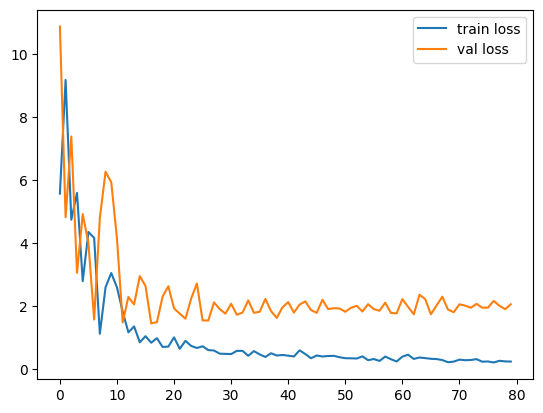

<Figure size 640x480 with 0 Axes>

In [19]:
plt.plot(r.history['loss'] , label = 'train loss')
plt.plot(r.history['val_loss'] , label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

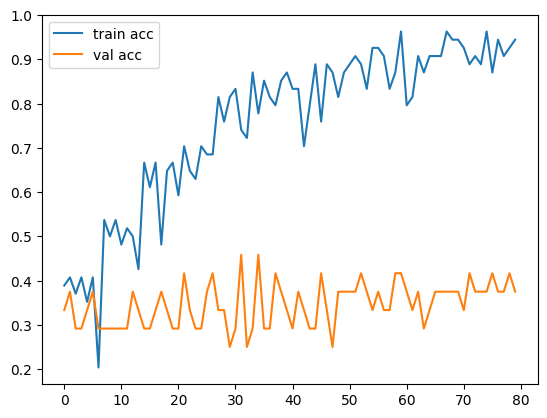

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(r.history['accuracy'] , label = 'train acc')
plt.plot(r.history['val_accuracy'] , label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [21]:
# save the model

from keras.models  import load_model
model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# path  of the model saved is: /content/model_resnet.h5

In [22]:
y_pred = model.predict(test_set)


1/1 [==============================] - 8s 8s/step


In [23]:
y_pred

array([[1.5366912e-02, 2.6423285e-02, 9.5820987e-01],
       [3.8450024e-01, 2.6529253e-01, 3.5020733e-01],
       [7.0866980e-02, 2.0076821e-02, 9.0905619e-01],
       [9.4362237e-02, 1.9680674e-01, 7.0883101e-01],
       [2.8041509e-01, 4.1062391e-01, 3.0896094e-01],
       [2.5620490e-01, 1.0553401e-01, 6.3826102e-01],
       [4.6857011e-01, 1.7776111e-02, 5.1365376e-01],
       [1.2497548e-01, 1.1895818e-01, 7.5606638e-01],
       [1.9978546e-01, 6.6544396e-01, 1.3477059e-01],
       [1.8659961e-01, 5.5136885e-02, 7.5826347e-01],
       [6.7746448e-03, 1.9092770e-02, 9.7413248e-01],
       [3.3762436e-02, 2.0804225e-02, 9.4543332e-01],
       [6.0958549e-02, 3.3243340e-01, 6.0660803e-01],
       [8.6865017e-05, 7.7732831e-02, 9.2218029e-01],
       [4.8294061e-01, 4.0336367e-02, 4.7672302e-01],
       [1.1195403e-01, 8.2158059e-01, 6.6465355e-02],
       [4.9910089e-01, 7.3207133e-02, 4.2769191e-01],
       [2.5582626e-02, 9.3229163e-01, 4.2125817e-02],
       [7.7870674e-03, 4.592

In [24]:
import numpy as np
y_pred = np.argmax(y_pred , axis = 1)

In [25]:
y_pred

array([2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2,
       1, 2])

In [26]:
from keras.models import load_model
from keras.preprocessing import image


In [27]:
model = load_model('model_resnet50.h5')


NameError: ignored

In [ ]:
img_data

NameError: ignored

In [ ]:
Image_data

NameError: ignored

In [47]:
img = image.load_img('/content/WhatsApp Image 2023-03-22 at 1.45.15 PM.jpeg', target_size =(224,224))


In [48]:
x = image.img_to_array(img)

In [49]:
x

array([[[112., 103.,  88.],
        [ 83.,  74.,  59.],
        [ 74.,  62.,  46.],
        ...,
        [142., 128., 117.],
        [ 34.,  22.,   8.],
        [109.,  97.,  81.]],

       [[164., 159., 137.],
        [155., 151., 126.],
        [137., 133., 106.],
        ...,
        [ 37.,  28.,  19.],
        [147., 135., 121.],
        [ 93.,  81.,  65.]],

       [[189., 183., 159.],
        [206., 200., 176.],
        [201., 195., 169.],
        ...,
        [ 46.,  36.,  26.],
        [104.,  92.,  78.],
        [125., 113.,  97.]],

       ...,

       [[ 80.,  77.,  72.],
        [ 90.,  87.,  82.],
        [ 70.,  67.,  62.],
        ...,
        [ 60.,  61.,  65.],
        [ 44.,  62.,  66.],
        [ 24.,  48.,  50.]],

       [[ 44.,  41.,  36.],
        [ 48.,  45.,  40.],
        [ 48.,  45.,  40.],
        ...,
        [ 70.,  78.,  80.],
        [ 86., 101., 106.],
        [143., 161., 163.]],

       [[ 51.,  48.,  43.],
        [ 52.,  49.,  44.],
        [ 50.,  

In [50]:
x.shape

(224, 224, 3)

In [51]:
x=x/255

In [52]:
import numpy as np
from keras.applications.resnet50 import preprocess_input

# Assuming x is your image data with shape (224, 224, 3)
x = np.expand_dims(x, axis=0) # Add a batch dimension
img_data = preprocess_input(x)
img_data.shape # This should give (1, 224, 224, 3)




(1, 224, 224, 3)

In [53]:
x

array([[[[-123.24078 , -116.37508 , -103.5939  ],
         [-123.35451 , -116.4888  , -103.707634],
         [-123.3898  , -116.535866, -103.75861 ],
         ...,
         [-123.12314 , -116.27704 , -103.48018 ],
         [-123.54667 , -116.692726, -103.90763 ],
         [-123.25255 , -116.398605, -103.62135 ]],

        [[-123.036865, -116.15547 , -103.40175 ],
         [-123.07216 , -116.186844, -103.444885],
         [-123.142746, -116.25743 , -103.523315],
         ...,
         [-123.534904, -116.6692  , -103.864494],
         [-123.10353 , -116.24959 , -103.46449 ],
         [-123.31529 , -116.46135 , -103.6841  ]],

        [[-122.93883 , -116.061356, -103.315475],
         [-122.872154, -115.99468 , -103.24881 ],
         [-122.89176 , -116.01429 , -103.27626 ],
         ...,
         [-123.49961 , -116.637825, -103.83704 ],
         [-123.272156, -116.41821 , -103.63312 ],
         [-123.189804, -116.33586 , -103.55861 ]],

        ...,

        [[-123.36627 , -116.477036, -1

In [54]:
model.predict(img_data)

1/1 [==============================] - 0s 134ms/step


array([[0.9448332 , 0.03603612, 0.01913073]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis =1 )


1/1 [==============================] - 0s 125ms/step


In [37]:
a==1

array([ True])

In [38]:
a

array([1])

In [39]:
# its predicted the 1st idex of the array ...means the second element of  the array
import pickle

In [ ]:
pickle.dump(model,open('/content/model_saved', 'wb'))

In [ ]:
tf.keras.models.save_model(model,'my_mode.hdf5')

NameError: ignored

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model, 'my_model.h5')

<ipython-input-89-07d2fb4e893f>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, 'my_model.h5')


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')





<ipython-input-94-4ee507dae086>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'my_model2.hdf5')


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st

@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/my_model2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # HOW BEAUTIFUL YOU ARE (ML_MDOEL: KRISH__NA)
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    size = (180,180)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.

        img_reshape = img[np.newaxis,...]

        prediction = model.predict(img_reshape)

        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


Overwriting app.py


In [ ]:
!ngrok config add-authtoken 2Yw7ZWbjad2jUsVF7pUQ5YzfeIe_6oiYURRMiKpXUiSSatecZ

/bin/bash: line 1: ngrok: command not found


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-12-01 10:28:29--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  48.7MB/s    in 0.3s    

2023-12-01 10:28:29 (48.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [ ]:

!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:

get_ipython().system_raw('./ngrok http 8501 &')


In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'



Execute the next cell and the go to the following URL: http://d4c4-35-229-126-13.ngrok.io


In [ ]:

!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.8/731.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.1-py3-none-any.whl size=21122 sha256=711086d6d72c653313171904b4d900399a602413784750376fe023506897a5c9
  Stored in directory: /root/.cache/pip/wheels/3b/32/0e/27789b6fde02bf2b320d6f1a0fd9e1354b257c5f75eefc29bc
Successfully built pyngrok


In [ ]:
!ngrok authtoken 2Yw7ZWbjad2jUsVF7pUQ5YzfeIe_6oiYURRMiKpXUiSSatecZ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

PyngrokNgrokHTTPError: ignored

In [ ]:

!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.126.13:8501

  Stopping...
^C


In [ ]:
!pip install -u ipykernel


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
!pip install -q streamlit


In [ ]:
!pip install  pyngrok

In [ ]:
!ngrok authtoken 2Yw7ZWbjad2jUsVF7pUQ5YzfeIe_6oiYURRMiKpXUiSSatecZ


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile score.py



import tensorflow as tf
import numpy as np
import streamlit as st
from PIL import Image
import requests
from io import BytesIO

st.set_option('deprecation.showfileUploaderEncoding', False)
st.title("Bean Image Classifier")
st.text("Provide URL of bean Image for image classification")

@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/model_saved')
  return model

with st.spinner('Loading Model Into Memory....'):
  model = load_model()

classes=['good_LOOks','bad_looks','average_looks']

def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image,[224,224])

def decode_img(image):
  img = tf.image.decode_jpeg(image, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)

path = st.text_input('Enter Image URL to Classify.. ','http://barmac.com.au/wp-content/uploads/sites/3/2016/01/Angular-Leaf-Spot-Beans1.jpg')
if path is not None:
    content = requests.get(path).content

    st.write("Predicted Class :")
    with st.spinner('classifying.....'):
      label =np.argmax(model.predict(decode_img(content)),axis=1)
      st.write(classes[label[0]])
    st.write("")
    image = Image.open(BytesIO(content))
    st.image(image, caption='Classifying Bean Image', use_column_width=True)


Writing score.py


In [ ]:
!nohup streamlit run score.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok

url = ngrok.connect(port=8501)
url

PyngrokNgrokHTTPError: ignored

In [ ]:
from pyngrok import ngrok

# Set the port number for the local server you want to expose
port = 8501  # Replace this with your desired port number

# Establish a tunnel to the local server
public_url = ngrok.connect(port=port)
print(f"Tunnel URL: {public_url}")

# Keep the tunnel open until the user exits the program
input("Press Enter to close the tunnel...\n")

# Close the tunnel when the program is terminated
ngrok.disconnect(public_url)


PyngrokNgrokHTTPError: ignored

In [ ]:
from pyngrok import ngrok

# Replace port=8501 with your desired port number
url = ngrok.connect(port=8502)
print("Tunnel URL:", url)


PyngrokNgrokHTTPError: ignored

In [ ]:
!streamlit run /content/score.py

  Stopping...
^C


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%writefile score.py

import tensorflow as tf
import numpy as np
import streamlit as st
from PIL import Image
import requests
from io import BytesIO

st.set_option('deprecation.showfileUploaderEncoding', False)
st.title("Bean Image Classifier")
st.text("Provide URL of bean Image for image classification")

@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('%%writefile score.py

import tensorflow as tf
import numpy as np
import streamlit as st
from PIL import Image
import requests
from io import BytesIO

st.set_option('deprecation.showfileUploaderEncoding', False)
st.title("Bean Image Classifier")
st.text("Provide URL of bean Image for image classification")

@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/drive/MyDrive/model_saved')
  return model

with st.spinner('Loading Model Into Memory....'):
  model = load_model()

classes=['average','bad_looks','good_looks']

def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image,[224,224])

def decode_img(image):
  img = tf.image.decode_jpeg(image, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)

path = st.text_input('Enter Image URL to Classify.. ','http://barmac.com.au/wp-content/uploads/sites/3/2016/01/Angular-Leaf-Spot-Beans1.jpg')
if path is not None:
    content = requests.get(path).content

    st.write("Predicted Class :")
    with st.spinner('classifying.....'):
      label =np.argmax(model.predict(decode_img(content)),axis=1)
      st.write(classes[label[0]])
    st.write("")
    image = Image.open(BytesIO(content))
    st.image(image, caption='Classifying Bean Image', use_column_width=True)

     ')
  return model

with st.spinner('Loading Model Into Memory....'):
  model = load_model()

classes=['angular_leaf_spot','bean_rust','healthy']

def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image,[224,224])

def decode_img(image):
  img = tf.image.decode_jpeg(image, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)

path = st.text_input('Enter Image URL to Classify.. ','http://barmac.com.au/wp-content/uploads/sites/3/2016/01/Angular-Leaf-Spot-Beans1.jpg')
if path is not None:
    content = requests.get(path).content

    st.write("Predicted Class :")
    with st.spinner('classifying.....'):
      label =np.argmax(model.predict(decode_img(content)),axis=1)
      st.write(classes[label[0]])
    st.write("")
    image = Image.open(BytesIO(content))
    st.image(image, caption='Classifying Bean Image', use_column_width=True)



In [ ]:
!nohup streamlit run score.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok

url = ngrok.connect(port=8501)

url


PyngrokNgrokHTTPError: ignored

In [40]:
import pickel

ModuleNotFoundError: ignored

In [41]:
import pickle

In [46]:
with open('model3.pkl' , 'wb') as file:
  pickle.dump(model,file)